<a href="https://colab.research.google.com/github/RodrigoLarroca/PortFolio/blob/main/Starcraft_players.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Starcraft - Gamers Analytics**

Conjunto de datos de jugadores de Starcraft - Gamers Analytics
Estos datos dan una idea sobre el triat de juego de los jugadores. Esto puede ayudar a reunir talento.
Este es un conjunto de datos de juegos de Starcraft. Esto brinda características sobre diferentes jugadores profesionales que juegan para un clan en particular en una liga diferente. Este conjunto de datos puede ser un conjunto de datos de referencia que se puede usar para agrupar jugadores talentosos y responder diferentes preguntas

# **Librerias, dataset**

In [ ]:
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
from sklearn import metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
starcraft=data=pd.read_csv('starcraft_player_data.csv')
pd.options.display.max_columns = None
starcraft.head(1)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.72,0.00,0.00,7,0.00,0.00,0.00,32.67,40.87,4.75,28,0.00,6,0.00,0.00


# **Data Wrangling**

In [ ]:
df=pd.DataFrame(starcraft)
df.head(1)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.72,0.00,0.00,7,0.00,0.00,0.00,32.67,40.87,4.75,28,0.00,6,0.00,0.00


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

(3395, 20)

Tiene 3395 filas y 20 columnas, sin valores faltantes en ninguna de las columnas. 

In [ ]:
#edad de obj a numerico (Age tiene valores '?'). Los nulos se reemplazan por la media.
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
mean_value_age = df['Age'].mean()
df['Age'] = df['Age'].apply(lambda x: mean_value_age if pd.isnull(x) else x)

#horas por semana de obj a numerico (HoursPerWeek tiene valores '?'). Los nulos se reemplazan por la media.
df['HoursPerWeek'] = pd.to_numeric(df['HoursPerWeek'], errors='coerce')
mean_value_hoursperweek = df['HoursPerWeek'].mean()
df['HoursPerWeek'] = df['HoursPerWeek'].apply(lambda x: mean_value_hoursperweek if pd.isnull(x) else x)

#total de horas de obj a numerico (TotalHours tiene valores '?'). Los nulos se reemplazan por la media.
df['TotalHours'] = pd.to_numeric(df['TotalHours'], errors='coerce')
mean_value_totalhours = df['TotalHours'].mean()
df['TotalHours'] = df['TotalHours'].apply(lambda x: mean_value_totalhours if pd.isnull(x) else x)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GameID,3395.00,4805.01,2719.94,52.00,2464.50,4874.00,7108.50,10095.00
LeagueIndex,3395.00,4.18,1.52,1.00,3.00,4.00,5.00,8.00
Age,3395.00,21.65,4.17,16.00,19.00,21.00,24.00,44.00
HoursPerWeek,3395.00,15.91,11.86,0.00,8.00,12.00,20.00,168.00
TotalHours,3395.00,960.42,17172.09,3.00,300.00,500.00,800.00,1000000.00
APM,3395.00,117.05,51.95,22.06,79.90,108.01,142.79,389.83
SelectByHotkeys,3395.00,0.00,0.01,0.00,0.00,0.00,0.01,0.04
AssignToHotkeys,3395.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
UniqueHotkeys,3395.00,4.36,2.36,0.00,3.00,4.00,6.00,10.00
MinimapAttacks,3395.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Según el resumen, parece que la mayoría de las columnas contienen principalmente ceros o valores muy pequeños. Esto es evidente debido a que los valores medios son cercanos a cero y la desviación estándar es baja. Por ejemplo, columnas como MinimapAttacks, MinimapRightClicks, NumberOfPACs, ComplexUnitsMade, ComplexAbilitiesUsed tienen en su mayoría valores cero.

Las columnas Age, HoursPerWeek y TotalHours tienen valores distintos de cero. La edad media de los jugadores es de 21,65 años, con una desviación típica de 4,17. El número medio de horas por semana que juegan los jugadores es 15,91, con una desviación estándar de 11,86. Y la media total de horas jugadas es 960,42, con una desviación estándar de 17172,09.

También vale la pena señalar que la columna TotalMapExplored tiene una media de 22,13, lo que puede indicar que la mayoría de los jugadores han explorado una cantidad similar del mapa del juego.

En general, parece que los datos en este DataFrame están muy sesgados y la mayoría de las columnas tienen muy poca variación. Es posible que los datos no sean representativos de la población de jugadores, o que los datos se hayan limpiado y preprocesado de una manera que haya eliminado gran parte de la variación.

In [ ]:
print(df.columns)

Index(['GameID', 'LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed'],
      dtype='object')


# EDA **Outliers**

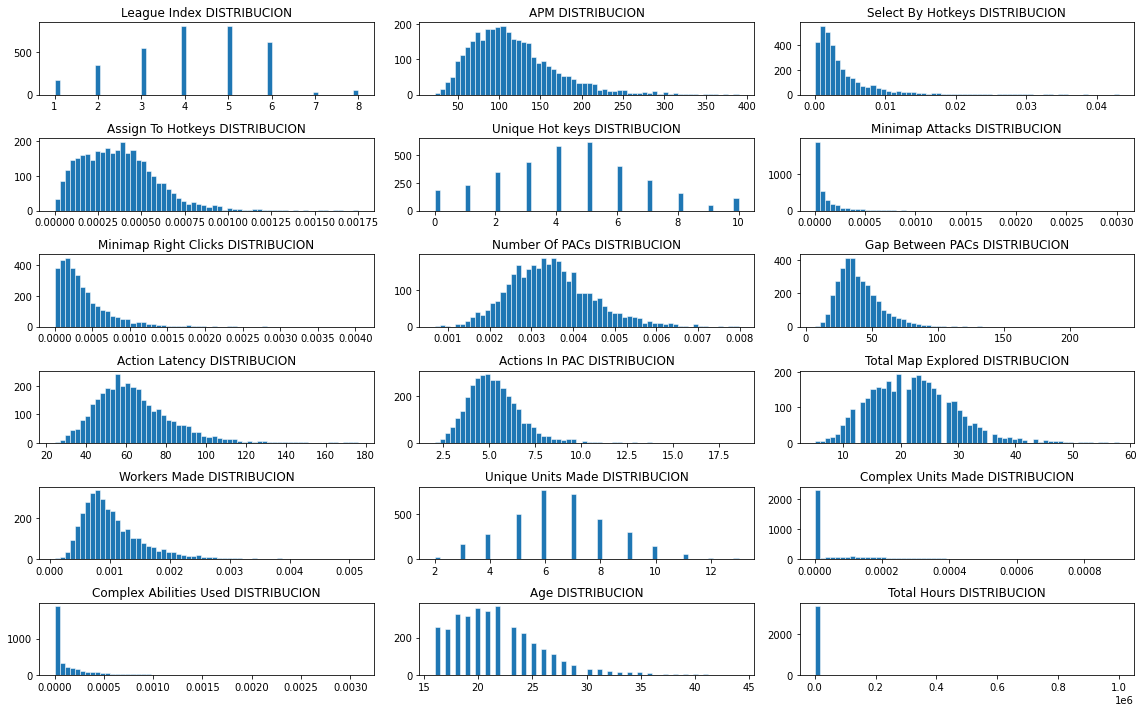

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=3,figsize=(16,10))

axes[0,0].hist(df['LeagueIndex'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("League Index DISTRIBUCION");

axes[0,1].hist(df['APM'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("APM DISTRIBUCION");

axes[0,2].hist(df['SelectByHotkeys'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("Select By Hotkeys DISTRIBUCION");

axes[1,0].hist(df['AssignToHotkeys'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("Assign To Hotkeys DISTRIBUCION");

axes[1,1].hist(df['UniqueHotkeys'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("Unique Hot keys DISTRIBUCION");

axes[1,2].hist(df['MinimapAttacks'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("Minimap Attacks DISTRIBUCION");

axes[2,0].hist(df['MinimapRightClicks'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("Minimap Right Clicks DISTRIBUCION");

axes[2,1].hist(df['NumberOfPACs'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("Number Of PACs DISTRIBUCION");

axes[2,2].hist(df['GapBetweenPACs'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("Gap Between PACs DISTRIBUCION");

axes[3,0].hist(df['ActionLatency'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,0].set_title("Action Latency DISTRIBUCION");

axes[3,1].hist(df['ActionsInPAC'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,1].set_title("Actions In PAC DISTRIBUCION");

axes[3,2].hist(df['TotalMapExplored'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,2].set_title("Total Map Explored DISTRIBUCION");

axes[4,0].hist(df['WorkersMade'], bins=60, linewidth=0.5, edgecolor="white")
axes[4,0].set_title("Workers Made DISTRIBUCION");

axes[4,1].hist(df['UniqueUnitsMade'], bins=60, linewidth=0.5, edgecolor="white")
axes[4,1].set_title("Unique Units Made DISTRIBUCION");

axes[4,2].hist(df['ComplexUnitsMade'], bins=60, linewidth=0.5, edgecolor="white")
axes[4,2].set_title("Complex Units Made DISTRIBUCION");

axes[5,0].hist(df['ComplexAbilitiesUsed'], bins=60, linewidth=0.5, edgecolor="white")
axes[5,0].set_title("Complex Abilities Used DISTRIBUCION");

axes[5,1].hist(df['Age'], bins=60, linewidth=0.5, edgecolor="white")
axes[5,1].set_title("Age DISTRIBUCION");

axes[5,2].hist(df['TotalHours'], bins=60, linewidth=0.5, edgecolor="white")
axes[5,2].set_title("Total Hours DISTRIBUCION");

plt.tight_layout()

Distribucion bastante normal en la mayoria de las columnas.

In [ ]:
def detect_outliers(df,n,features):
  outlier_indices = []
  columns_with_outliers = []
  for col in features:
      #25%
      Q1 = np.percentile(df[col], 25)
      #75%
      Q3 = np.percentile(df[col],75)
      #IQR
      IQR = Q3 - Q1
      outlier_step = 1.5 * IQR
      outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
      outlier_indices.extend(outlier_list_col)
      if len(outlier_list_col)>0:
        columns_with_outliers.append(col)
    #observaciones con más de 2 valores atípicos
  outlier_indices = Counter(outlier_indices)        
  multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
  return multiple_outliers, columns_with_outliers 

       #Outliers
Outliers_IQR, columns_with_outliers = detect_outliers(df,2,['GameID', 'LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed'])
      #Drop outliers
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

In [ ]:
print(columns_with_outliers)

['Age', 'HoursPerWeek', 'TotalHours', 'APM', 'SelectByHotkeys', 'AssignToHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilitiesUsed']


In [ ]:
original_len = len(df)
outliers_removed_len = len(df_out)
diff = original_len - outliers_removed_len
print("Se eliminaron", diff, "valores atípicos en total")

Se eliminaron 226 valores atípicos en total


No interesa en el analisis variables outliers en este caso se borran.

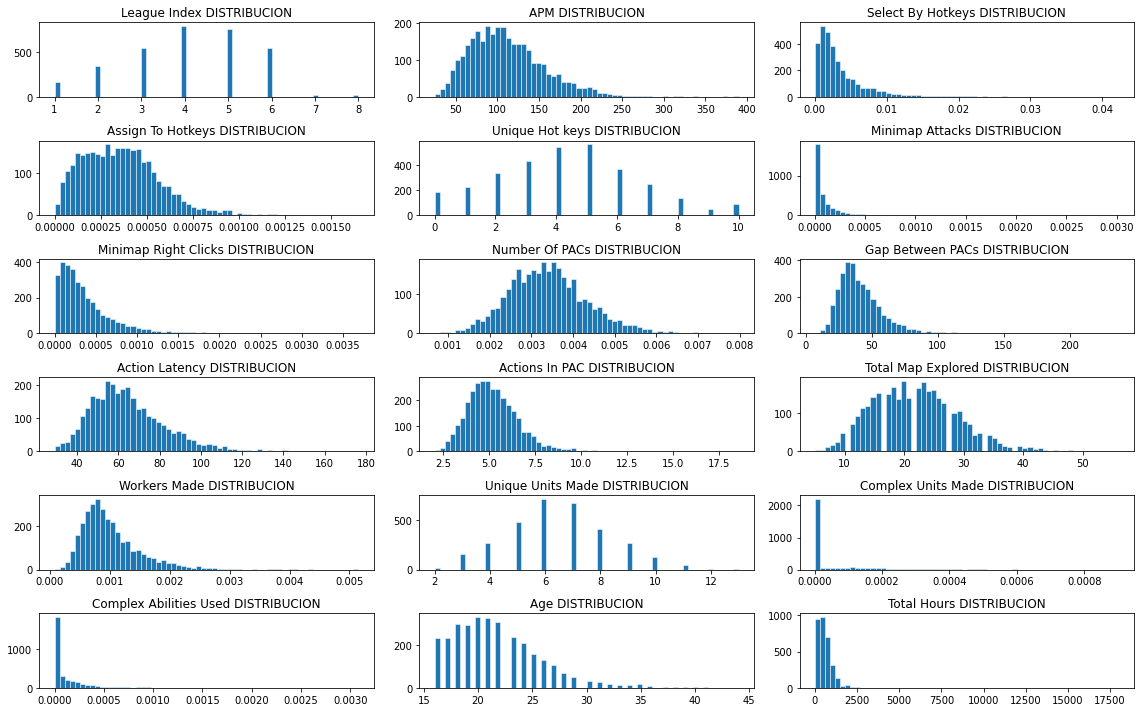

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=3,figsize=(16,10))

axes[0,0].hist(df_out['LeagueIndex'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("League Index DISTRIBUCION");

axes[0,1].hist(df_out['APM'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("APM DISTRIBUCION");

axes[0,2].hist(df_out['SelectByHotkeys'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("Select By Hotkeys DISTRIBUCION");

axes[1,0].hist(df_out['AssignToHotkeys'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("Assign To Hotkeys DISTRIBUCION");

axes[1,1].hist(df_out['UniqueHotkeys'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("Unique Hot keys DISTRIBUCION");

axes[1,2].hist(df_out['MinimapAttacks'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("Minimap Attacks DISTRIBUCION");

axes[2,0].hist(df_out['MinimapRightClicks'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("Minimap Right Clicks DISTRIBUCION");

axes[2,1].hist(df_out['NumberOfPACs'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("Number Of PACs DISTRIBUCION");

axes[2,2].hist(df_out['GapBetweenPACs'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("Gap Between PACs DISTRIBUCION");

axes[3,0].hist(df_out['ActionLatency'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,0].set_title("Action Latency DISTRIBUCION");

axes[3,1].hist(df_out['ActionsInPAC'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,1].set_title("Actions In PAC DISTRIBUCION");

axes[3,2].hist(df_out['TotalMapExplored'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,2].set_title("Total Map Explored DISTRIBUCION");

axes[4,0].hist(df_out['WorkersMade'], bins=60, linewidth=0.5, edgecolor="white")
axes[4,0].set_title("Workers Made DISTRIBUCION");

axes[4,1].hist(df_out['UniqueUnitsMade'], bins=60, linewidth=0.5, edgecolor="white")
axes[4,1].set_title("Unique Units Made DISTRIBUCION");

axes[4,2].hist(df_out['ComplexUnitsMade'], bins=60, linewidth=0.5, edgecolor="white")
axes[4,2].set_title("Complex Units Made DISTRIBUCION");

axes[5,0].hist(df_out['ComplexAbilitiesUsed'], bins=60, linewidth=0.5, edgecolor="white")
axes[5,0].set_title("Complex Abilities Used DISTRIBUCION");

axes[5,1].hist(df_out['Age'], bins=60, linewidth=0.5, edgecolor="white")
axes[5,1].set_title("Age DISTRIBUCION");

axes[5,2].hist(df_out['TotalHours'], bins=60, linewidth=0.5, edgecolor="white")
axes[5,2].set_title("Total Hours DISTRIBUCION");

plt.tight_layout()

Mejora minima

No se ve que los outliers repercutan mucho sobre los datos originales. Se dejaran y trabajaran sin los mismos igualmente.

# EDA **Analisis general**

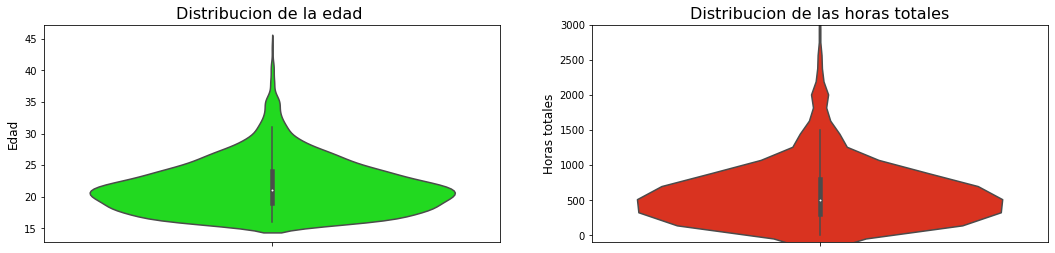

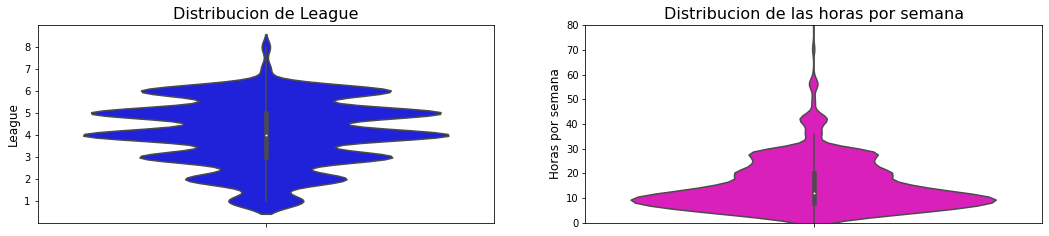

In [ ]:
#Distribucion de la edad
plt.figure(figsize=(18,4))
plt.subplot(121)
sns.violinplot(y=df_out["Age"], color='#04F801')
plt.ylabel('Edad', fontsize=12)
plt.title('Distribucion de la edad ', fontsize=16);

#Distribucion de las horas totales
plt.subplot(122)
sns.violinplot(y=df_out["TotalHours"], color='#F81B01')
plt.ylabel('Horas totales', fontsize=12)
plt.ylim(-100,3000)
plt.title('Distribucion de las horas totales', fontsize=16);

#Distribucion de League
plt.figure(figsize=(18,8))
plt.subplot(221)
sns.violinplot(y=df_out["LeagueIndex"], color='#0104F8')
plt.ylabel('League', fontsize=12)

plt.title('Distribucion de League', fontsize=16);

#Distribucion de las horas por semana
plt.subplot(222)
sns.violinplot(y=df_out["HoursPerWeek"], color='#F801CF')
plt.ylabel('Horas por semana', fontsize=12)
plt.ylim(0,80)
plt.title('Distribucion de las horas por semana', fontsize=16);


*   La mayoria de jugadores tiene entre 18 y 22 años.
*   La mayoria de jugadores jugaron entre 250 y 750 horas.
*   La mayoria de jugadores estan en la liga 4 y 5.
*   La mayoria de jugadores juega entre 8 y 12 hs por semana.

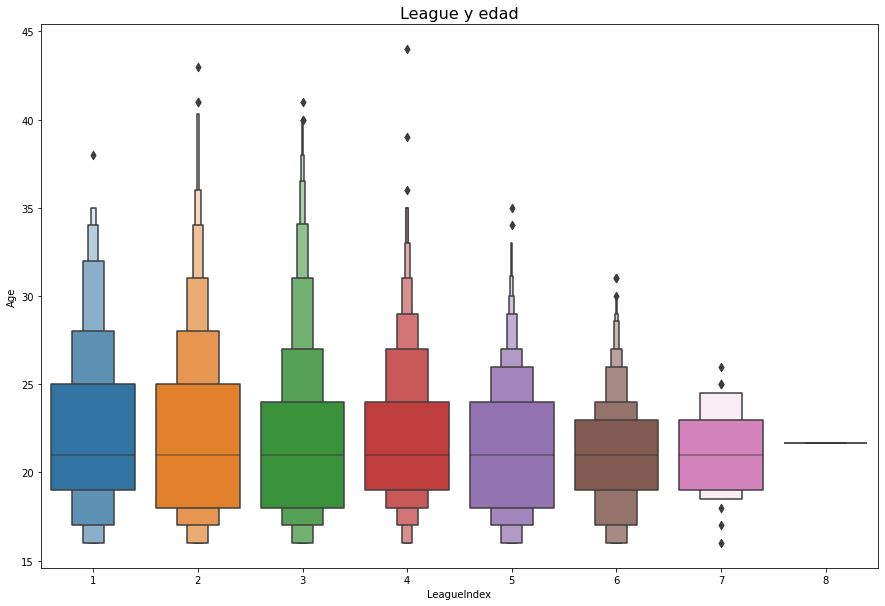

In [ ]:
#de "AYUSH OTURKAR"
#https://www.kaggle.com/code/ayushnitb/starcraft-gamers-analytics
plt.figure(figsize=(15, 10))
sns.boxenplot(data=df_out, x="LeagueIndex", y="Age", k_depth="trustworthy")
plt.title('League y edad', fontsize=16);

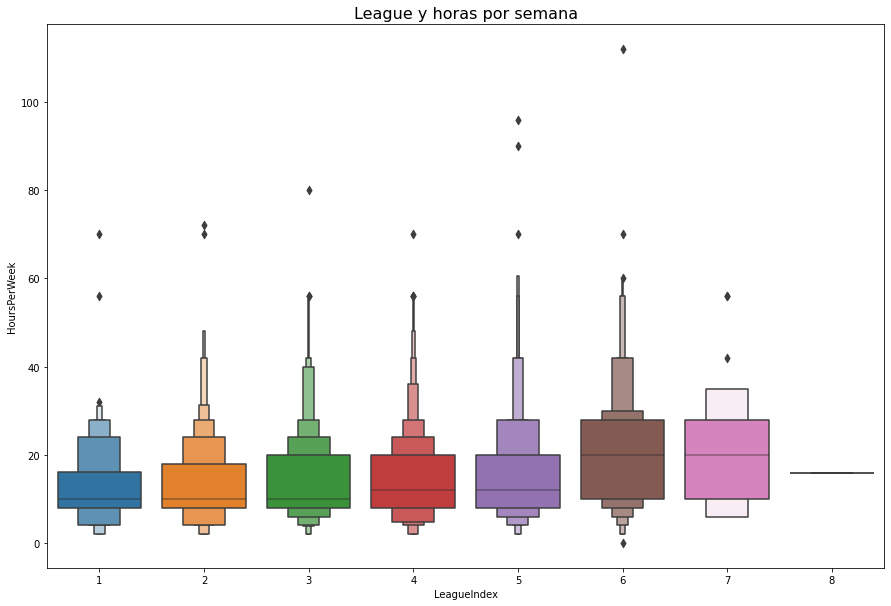

In [ ]:
#de "AYUSH OTURKAR"
#https://www.kaggle.com/code/ayushnitb/starcraft-gamers-analytics
plt.figure(figsize=(15, 10))
sns.boxenplot(data=df_out, x="LeagueIndex", y="HoursPerWeek", k_depth="trustworthy")
plt.title('League y horas por semana', fontsize=16);

# EDA **Analisis mas especifico**

In [ ]:
df_out.head(1)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27.00,10.00,3000.00,143.72,0.00,0.00,7,0.00,0.00,0.00,32.67,40.87,4.75,28,0.00,6,0.00,0.00


In [ ]:
total_count = 0
total_percentage = 0
for i in range(1, 9):
    print('Cantidad de Liga', i, ': ', len(df_out[df_out['LeagueIndex'] == i]), 'en porcentaje:', round(df_out['LeagueIndex'].value_counts()[i]/len(df_out) * 100,2), '%')
    total_count += len(df_out[df_out['LeagueIndex'] == i])
    total_percentage += round(df_out['LeagueIndex'].value_counts()[i]/len(df_out) * 100,2)
print("Cuenta total:", total_count, "Porcentaje total:", total_percentage, "%")

Cantidad de Liga 1 :  161 en porcentaje: 5.08 %
Cantidad de Liga 2 :  346 en porcentaje: 10.92 %
Cantidad de Liga 3 :  543 en porcentaje: 17.13 %
Cantidad de Liga 4 :  788 en porcentaje: 24.87 %
Cantidad de Liga 5 :  754 en porcentaje: 23.79 %
Cantidad de Liga 6 :  538 en porcentaje: 16.98 %
Cantidad de Liga 7 :  21 en porcentaje: 0.66 %
Cantidad de Liga 8 :  18 en porcentaje: 0.57 %
Cuenta total: 3169 Porcentaje total: 99.99999999999999 %


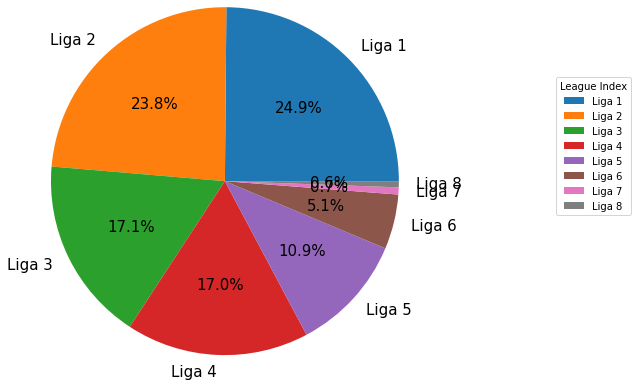

In [ ]:
textprops = {"fontsize":15}
 
counts = df_out['LeagueIndex'].value_counts()

labels = counts.index
values = counts.values

plt.pie(values, labels=['Liga 1', 'Liga 2', 'Liga 3', 'Liga 4', 'Liga 5', 'Liga 6', 'Liga 7', 'Liga 8'], autopct='%1.1f%%', radius=2,textprops=textprops)

plt.legend(title='League Index',loc='upper left',  bbox_to_anchor=(2, 0, 0.8, 1))

plt.show()

In [ ]:
df_LeagueIndex1 = df_out[df_out['LeagueIndex'] == 1]
df_LeagueIndex2 = df_out[df_out['LeagueIndex'] == 2]
df_LeagueIndex3 = df_out[df_out['LeagueIndex'] == 3]
df_LeagueIndex4 = df_out[df_out['LeagueIndex'] == 4]
df_LeagueIndex5 = df_out[df_out['LeagueIndex'] == 5]
df_LeagueIndex6 = df_out[df_out['LeagueIndex'] == 6]
df_LeagueIndex7 = df_out[df_out['LeagueIndex'] == 7]
df_LeagueIndex8 = df_out[df_out['LeagueIndex'] == 8]

¿Qué es el APM en un juego?
Acrónimo de Actions per Minute (Acciones por Minuto). En juegos de estrategia en tiempo real, o RTS, número de acciones que un jugador puede realizar en un minuto, como seleccionar unidades, ordenar una tarea, etc). Los grandes jugadores realizan alrededor de 300-400 acciones por minuto, incluso más.

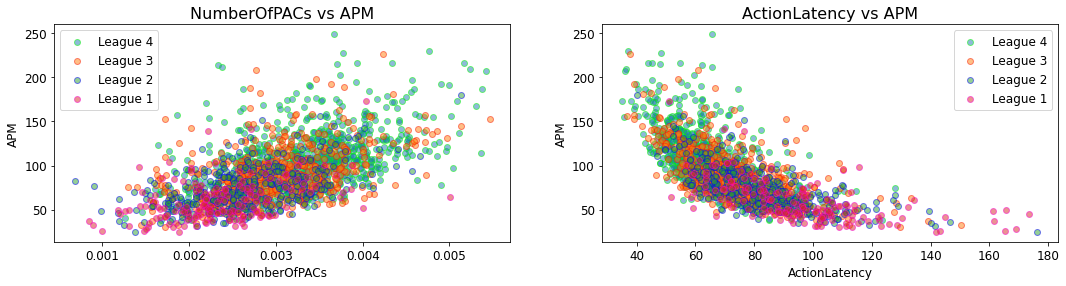

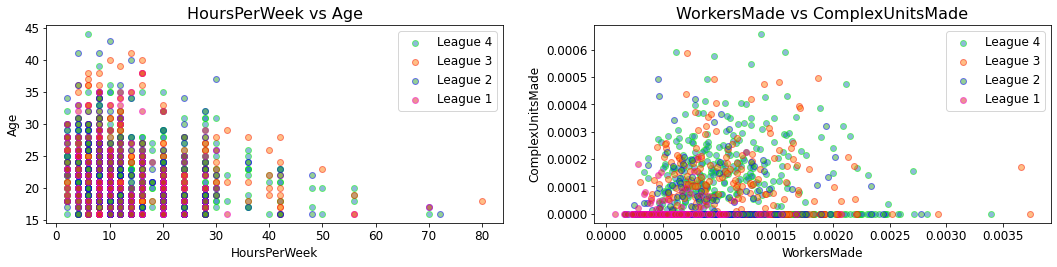

In [ ]:
#NumberOfPACs vs APM
plt.figure(figsize=(18,4))
plt.subplot(121)
plt.scatter(df_LeagueIndex4['NumberOfPACs'], df_LeagueIndex4['APM'], edgecolor='#04F801', alpha=0.5, label= 'League 4')
plt.scatter(df_LeagueIndex3['NumberOfPACs'], df_LeagueIndex3['APM'], edgecolor='#F81B01', alpha=0.5, label= 'League 3')
plt.scatter(df_LeagueIndex2['NumberOfPACs'], df_LeagueIndex2['APM'], edgecolor='#0104F8', alpha=0.5, label= 'League 2')
plt.scatter(df_LeagueIndex1['NumberOfPACs'], df_LeagueIndex1['APM'], edgecolor='#F801CF', alpha=0.5, label= 'League 1')
plt.legend(loc='best', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('APM', fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('NumberOfPACs', fontsize=12)
plt.title('NumberOfPACs vs APM', fontsize=16);

#ActionLatency vs APM
plt.subplot(122)
plt.scatter(df_LeagueIndex4['ActionLatency'], df_LeagueIndex4['APM'], edgecolor='#04F801', alpha=0.5, label= 'League 4')
plt.scatter(df_LeagueIndex3['ActionLatency'], df_LeagueIndex3['APM'], edgecolor='#F81B01', alpha=0.5, label= 'League 3')
plt.scatter(df_LeagueIndex2['ActionLatency'], df_LeagueIndex2['APM'], edgecolor='#0104F8', alpha=0.5, label= 'League 2')
plt.scatter(df_LeagueIndex1['ActionLatency'], df_LeagueIndex1['APM'], edgecolor='#F801CF', alpha=0.5, label= 'League 1')
plt.legend(loc='best', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('APM', fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('ActionLatency', fontsize=12)
plt.title('ActionLatency vs APM', fontsize=16);

#HoursPerWeek vs Age
plt.figure(figsize=(18,8))
plt.subplot(221)
plt.scatter(df_LeagueIndex4['HoursPerWeek'], df_LeagueIndex4['Age'], edgecolor='#04F801', alpha=0.5, label= 'League 4')
plt.scatter(df_LeagueIndex3['HoursPerWeek'], df_LeagueIndex3['Age'], edgecolor='#F81B01', alpha=0.5, label= 'League 3')
plt.scatter(df_LeagueIndex2['HoursPerWeek'], df_LeagueIndex2['Age'], edgecolor='#0104F8', alpha=0.5, label= 'League 2')
plt.scatter(df_LeagueIndex1['HoursPerWeek'], df_LeagueIndex1['Age'], edgecolor='#F801CF', alpha=0.5, label= 'League 1')
plt.legend(loc='best', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('HoursPerWeek', fontsize=12)
plt.title('HoursPerWeek vs Age', fontsize=16);

#WorkersMade vs ComplexUnitsMade
plt.subplot(222)
plt.scatter(df_LeagueIndex4['WorkersMade'], df_LeagueIndex4['ComplexUnitsMade'], edgecolor='#04F801', alpha=0.5, label= 'League 4')
plt.scatter(df_LeagueIndex3['WorkersMade'], df_LeagueIndex3['ComplexUnitsMade'], edgecolor='#F81B01', alpha=0.5, label= 'League 3')
plt.scatter(df_LeagueIndex2['WorkersMade'], df_LeagueIndex2['ComplexUnitsMade'], edgecolor='#0104F8', alpha=0.5, label= 'League 2')
plt.scatter(df_LeagueIndex1['WorkersMade'], df_LeagueIndex1['ComplexUnitsMade'], edgecolor='#F801CF', alpha=0.5, label= 'League 1')
plt.legend(loc='best', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('ComplexUnitsMade', fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('WorkersMade', fontsize=12)
plt.title('WorkersMade vs ComplexUnitsMade', fontsize=16);

En general, las ligas mas altas tienen APM, Menos Actionlatency, en la edad la mayoria de jovenes juegan mas horas, aunque las ligas mas altas dedican mas horas. Las ligas altas tienen mas ComplexUnitsMade y Workers.

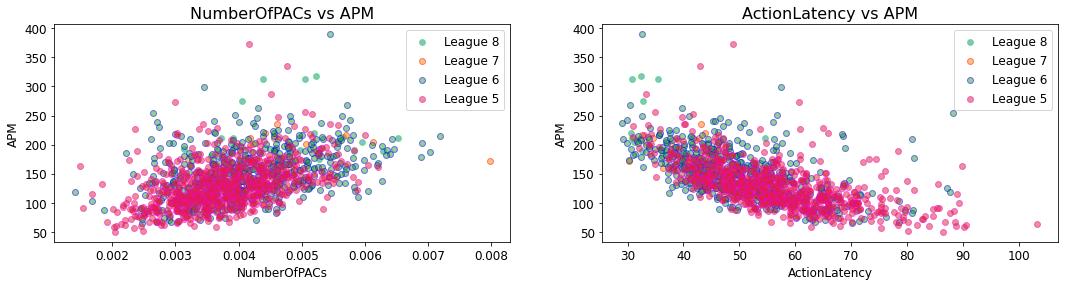

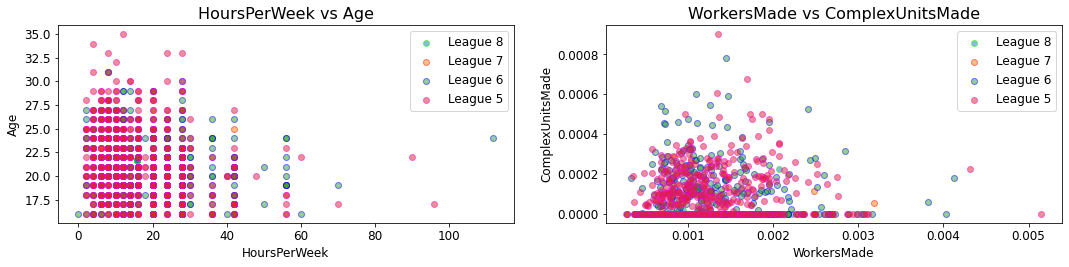

In [ ]:
#NumberOfPACs vs APM
plt.figure(figsize=(18,4))
plt.subplot(121)
plt.scatter(df_LeagueIndex8['NumberOfPACs'], df_LeagueIndex8['APM'], edgecolor='#04F801', alpha=0.5, label= 'League 8')
plt.scatter(df_LeagueIndex7['NumberOfPACs'], df_LeagueIndex7['APM'], edgecolor='#F81B01', alpha=0.5, label= 'League 7')
plt.scatter(df_LeagueIndex6['NumberOfPACs'], df_LeagueIndex6['APM'], edgecolor='#0104F8', alpha=0.5, label= 'League 6')
plt.scatter(df_LeagueIndex5['NumberOfPACs'], df_LeagueIndex5['APM'], edgecolor='#F801CF', alpha=0.5, label= 'League 5')
plt.legend(loc='best', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('APM', fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('NumberOfPACs', fontsize=12)
plt.title('NumberOfPACs vs APM', fontsize=16);

#ActionLatency vs APM
plt.subplot(122)
plt.scatter(df_LeagueIndex8['ActionLatency'], df_LeagueIndex8['APM'], edgecolor='#04F801', alpha=0.5, label= 'League 8')
plt.scatter(df_LeagueIndex7['ActionLatency'], df_LeagueIndex7['APM'], edgecolor='#F81B01', alpha=0.5, label= 'League 7')
plt.scatter(df_LeagueIndex6['ActionLatency'], df_LeagueIndex6['APM'], edgecolor='#0104F8', alpha=0.5, label= 'League 6')
plt.scatter(df_LeagueIndex5['ActionLatency'], df_LeagueIndex5['APM'], edgecolor='#F801CF', alpha=0.5, label= 'League 5')
plt.legend(loc='best', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('APM', fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('ActionLatency', fontsize=12)
plt.title('ActionLatency vs APM', fontsize=16);

#HoursPerWeek vs Age
plt.figure(figsize=(18,8))
plt.subplot(221)
plt.scatter(df_LeagueIndex8['HoursPerWeek'], df_LeagueIndex8['Age'], edgecolor='#04F801', alpha=0.5, label= 'League 8')
plt.scatter(df_LeagueIndex7['HoursPerWeek'], df_LeagueIndex7['Age'], edgecolor='#F81B01', alpha=0.5, label= 'League 7')
plt.scatter(df_LeagueIndex6['HoursPerWeek'], df_LeagueIndex6['Age'], edgecolor='#0104F8', alpha=0.5, label= 'League 6')
plt.scatter(df_LeagueIndex5['HoursPerWeek'], df_LeagueIndex5['Age'], edgecolor='#F801CF', alpha=0.5, label= 'League 5')
plt.legend(loc='best', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('HoursPerWeek', fontsize=12)
plt.title('HoursPerWeek vs Age', fontsize=16);

#WorkersMade vs ComplexUnitsMade
plt.subplot(222)
plt.scatter(df_LeagueIndex8['WorkersMade'], df_LeagueIndex8['ComplexUnitsMade'], edgecolor='#04F801', alpha=0.5, label= 'League 8')
plt.scatter(df_LeagueIndex7['WorkersMade'], df_LeagueIndex7['ComplexUnitsMade'], edgecolor='#F81B01', alpha=0.5, label= 'League 7')
plt.scatter(df_LeagueIndex6['WorkersMade'], df_LeagueIndex6['ComplexUnitsMade'], edgecolor='#0104F8', alpha=0.5, label= 'League 6')
plt.scatter(df_LeagueIndex5['WorkersMade'], df_LeagueIndex5['ComplexUnitsMade'], edgecolor='#F801CF', alpha=0.5, label= 'League 5')
plt.legend(loc='best', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('ComplexUnitsMade', fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('WorkersMade', fontsize=12)
plt.title('WorkersMade vs ComplexUnitsMade', fontsize=16);

En general, las ligas mas altas tienen APM, Menos Actionlatency, en la edad la mayoria de jovenes juegan mas horas, aunque las ligas mas altas dedican mas horas. Las ligas altas tienen mas ComplexUnitsMade y Workers.

# Pre seleccion de modelo **Lazy Pred**

In [ ]:
X = df_out.drop(columns = ['LeagueIndex'])     # feature matrix
y = df_out['LeagueIndex']                      # target feature
df_out.head(1)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27.00,10.00,3000.00,143.72,0.00,0.00,7,0.00,0.00,0.00,32.67,40.87,4.75,28,0.00,6,0.00,0.00


In [ ]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features
warnings.filterwarnings('ignore')
stepwise_selection(X,y)

['ActionLatency',
 'TotalHours',
 'AssignToHotkeys',
 'MinimapAttacks',
 'GapBetweenPACs',
 'NumberOfPACs',
 'WorkersMade',
 'SelectByHotkeys',
 'UniqueHotkeys',
 'TotalMapExplored',
 'ComplexUnitsMade',
 'UniqueUnitsMade']

In [ ]:
dfstar = df_out[['ActionLatency','TotalHours','AssignToHotkeys','MinimapAttacks','GapBetweenPACs','NumberOfPACs','WorkersMade','SelectByHotkeys',
 'UniqueHotkeys','TotalMapExplored','ComplexUnitsMade','UniqueUnitsMade','LeagueIndex']]

In [ ]:
X = dfstar.drop(columns = ['LeagueIndex'])     # feature matrix
y = dfstar['LeagueIndex']                      # target feature
dfstar.head(1)

,ActionLatency,TotalHours,AssignToHotkeys,MinimapAttacks,GapBetweenPACs,NumberOfPACs,WorkersMade,SelectByHotkeys,UniqueHotkeys,TotalMapExplored,ComplexUnitsMade,UniqueUnitsMade,LeagueIndex
0,40.87,3000.00,0.00,0.00,32.67,0.00,0.00,0.00,7,28,0.00,6,5


In [ ]:
y.head(2)

0    5
1    5
Name: LeagueIndex, dtype: int64

In [ ]:
X.head(2)

,ActionLatency,TotalHours,AssignToHotkeys,MinimapAttacks,GapBetweenPACs,NumberOfPACs,WorkersMade,SelectByHotkeys,UniqueHotkeys,TotalMapExplored,ComplexUnitsMade,UniqueUnitsMade
0,40.87,3000.00,0.00,0.00,32.67,0.00,0.00,0.00,7,28,0.00,6
1,42.35,5000.00,0.00,0.00,32.92,0.00,0.00,0.00,4,22,0.00,5


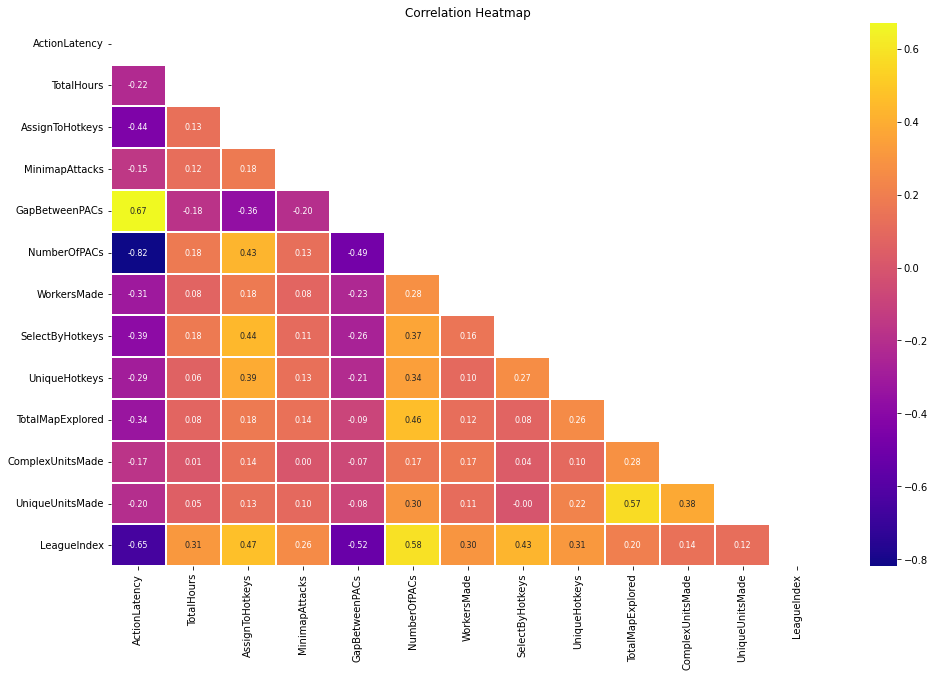

In [ ]:
plt.figure(figsize= (16,10))
mask = np.triu(np.ones_like(dfstar.corr(),dtype = bool))
sns.heatmap(dfstar.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma', annot_kws={'size':8})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
clf = LazyClassifier(verbose=0,predictions=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:12<00:00,  2.24it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.35,0.50,None,0.34,0.02
QuadraticDiscriminantAnalysis,0.35,0.45,None,0.35,0.01
NearestCentroid,0.31,0.37,None,0.32,0.01
DecisionTreeClassifier,0.32,0.36,None,0.32,0.04
LinearDiscriminantAnalysis,0.40,0.36,None,0.40,0.04
LabelPropagation,0.33,0.34,None,0.33,0.35
LabelSpreading,0.33,0.33,None,0.33,0.51
LGBMClassifier,0.38,0.33,None,0.38,1.57
LogisticRegression,0.41,0.32,None,0.40,0.16


No se continua con ningun modelo debido a la baja calidad en sus resultados. Podria implementarse otras columnas como tiempo de pase en cada liga, años jugando, perioricidad de juego, etc.